In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [22]:
conn =sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockturnOver,SalesPurchaseratio,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897


# Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [24]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


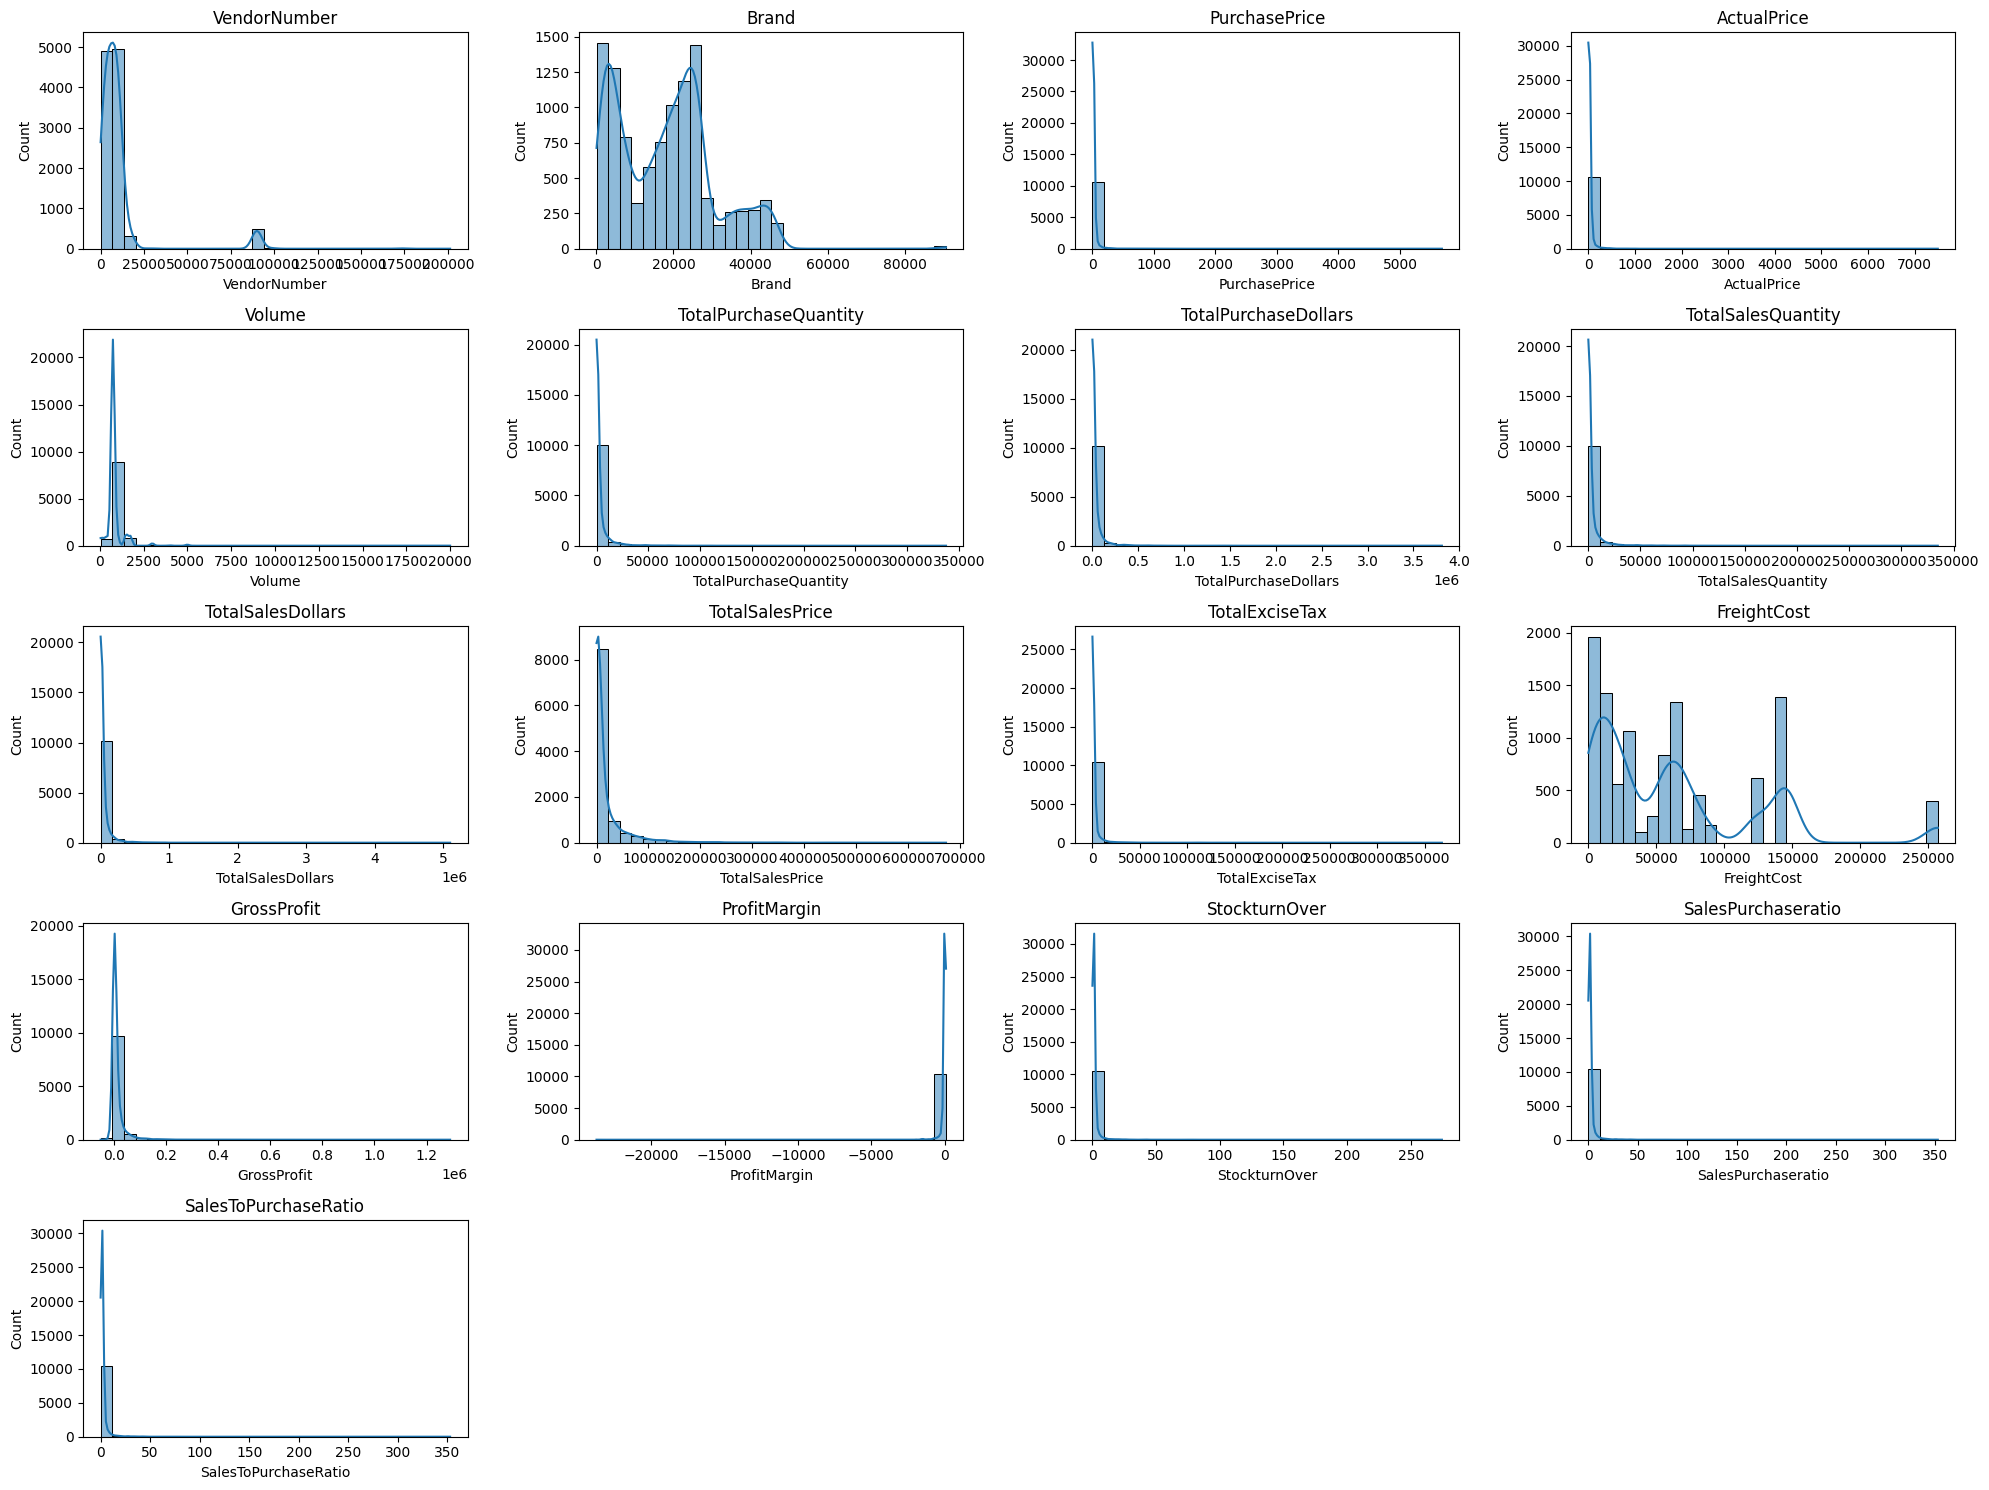

In [26]:
# Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

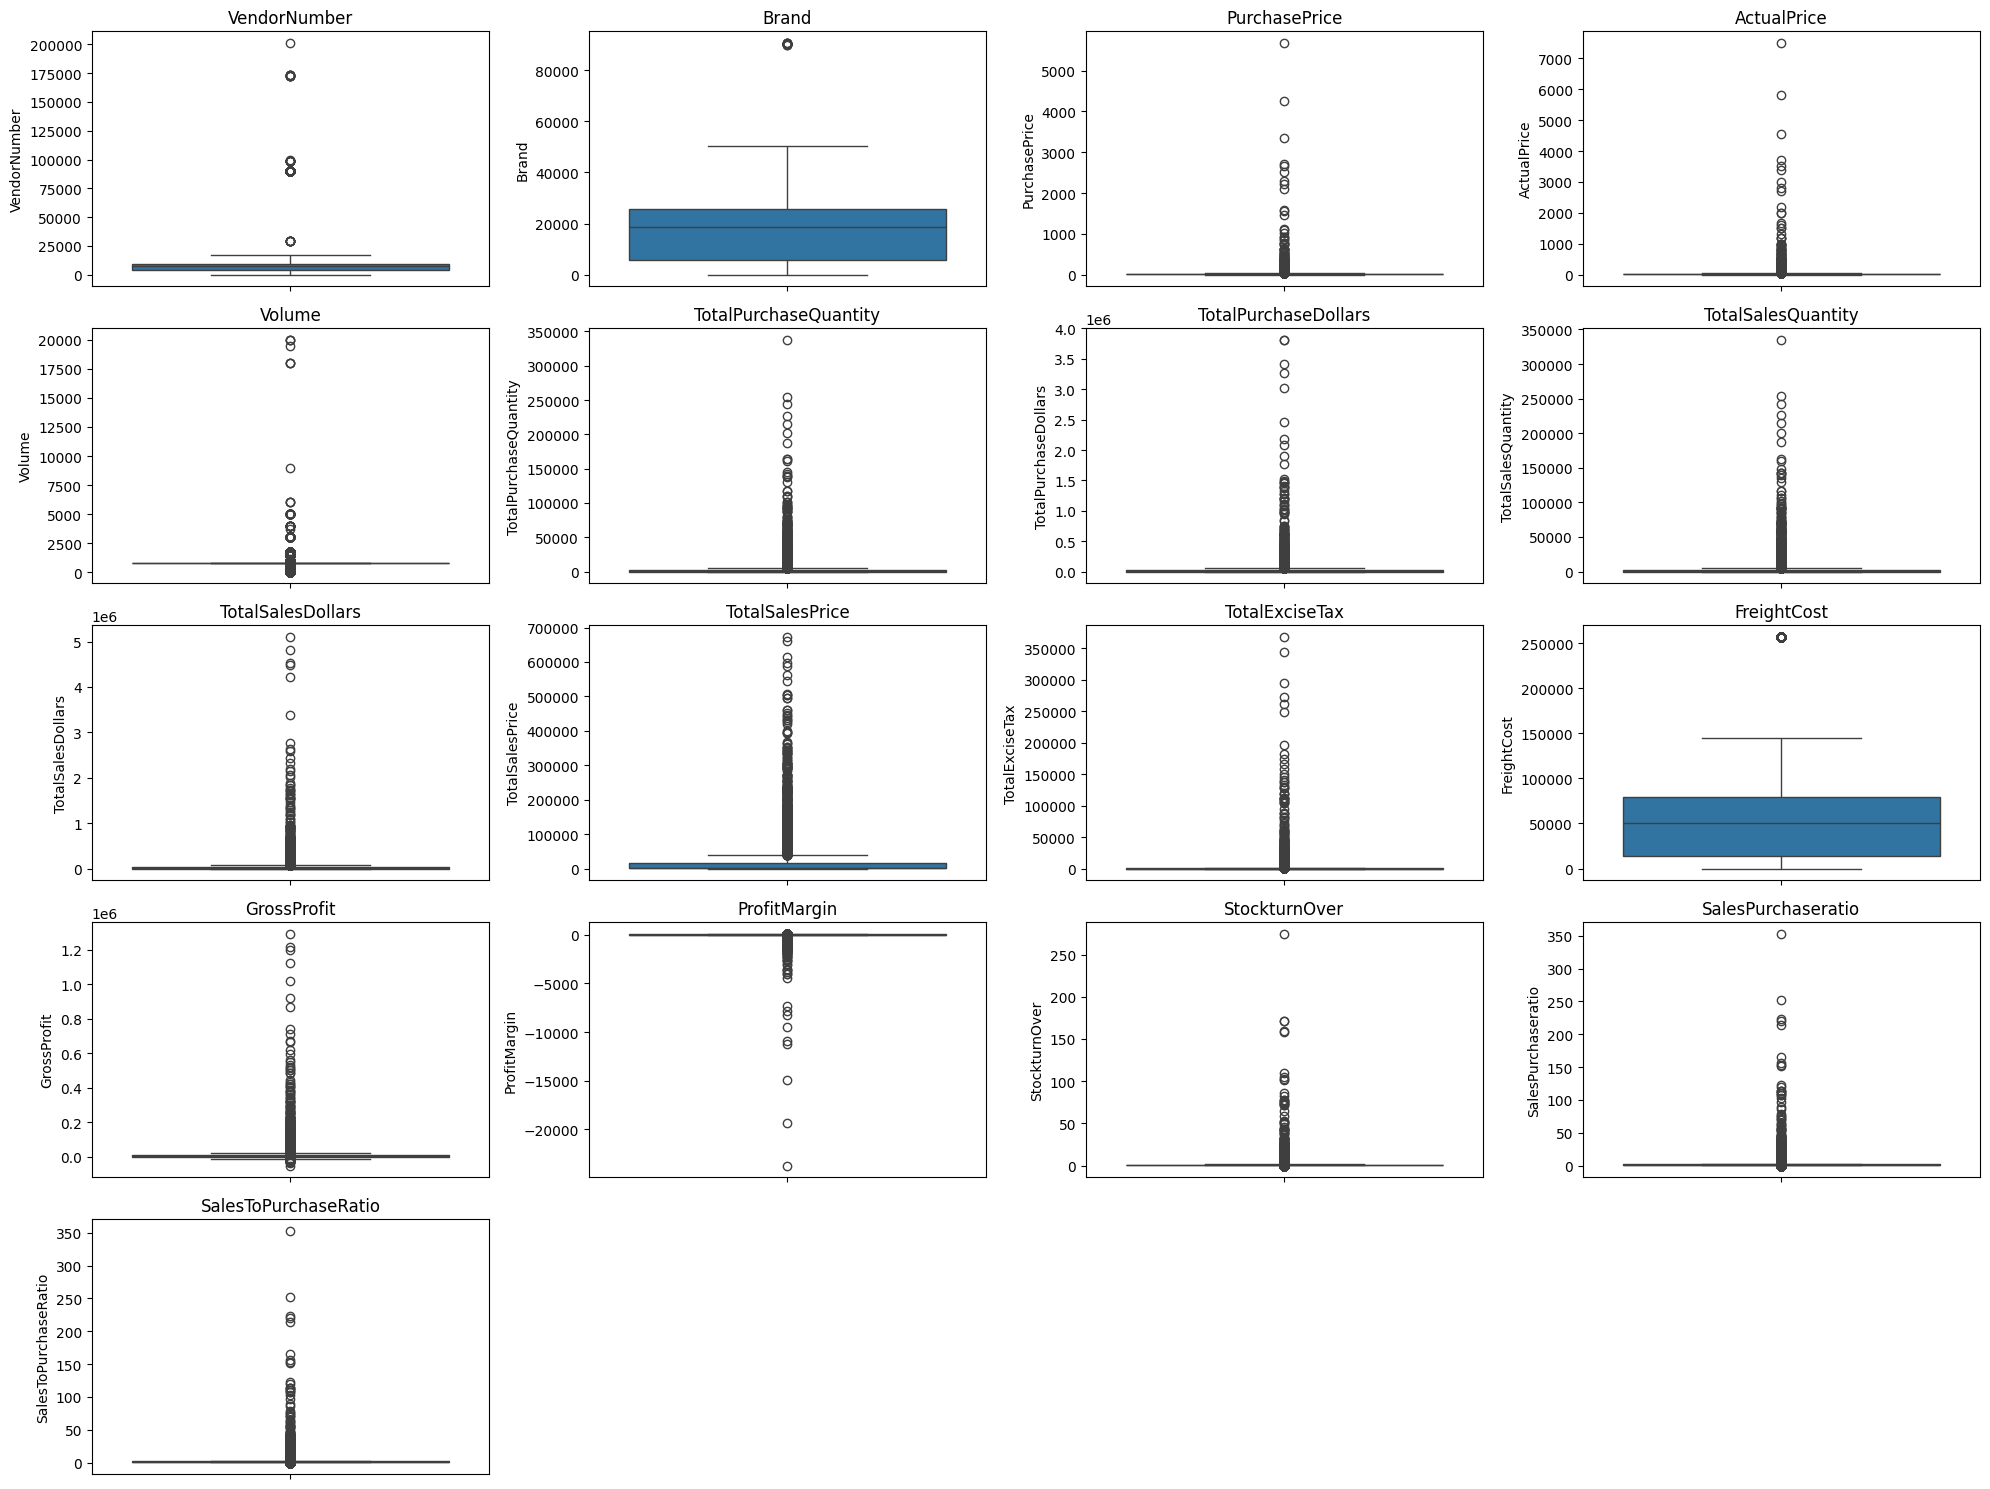

In [28]:
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights

### Negative & Zero Values:
- **Gross Profit**: The minimum recorded value is **-52,002.78**, reflecting losses. This indicates certain products or transactions are being sold below cost, either due to high expenses or heavy discounting.  
- **Profit Margin**: The minimum value is **-∞**, which highlights cases where revenue is zero or even less than costs.  
- **Total Sales Quantity & Sales Dollars**: Both have a minimum of **0**, meaning some products were purchased but never sold — possibly due to being slow-moving or obsolete stock.  

### Outliers Highlighted by High Standard Deviations:
- **Purchase & Actual Prices**: Maximum values (**5,681.81 & 7,499.99**) are much higher than the mean (**24.39 & 35.64**), suggesting premium or outlier products.  
- **Freight Cost**: Extremely wide variation (**0.09 to 257,032.07**) suggests inefficiencies in logistics or cases of bulk shipping.  
- **Stock Turnover**: Ranges from **0 to 274.5**, implying some products sell very quickly while others remain unsold indefinitely. A value greater than **1** indicates sold quantity exceeds purchased quantity — likely because orders are being fulfilled from old inventory.  


In [30]:
df=pd.read_sql_query("""select *
From vendor_sales_summary
WHERE GrossProfit >0
and ProfitMargin > 0
and TotalSalesQuantity > 0 """,conn)

In [32]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockturnOver,SalesPurchaseratio,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388


<function matplotlib.pyplot.show(close=None, block=None)>

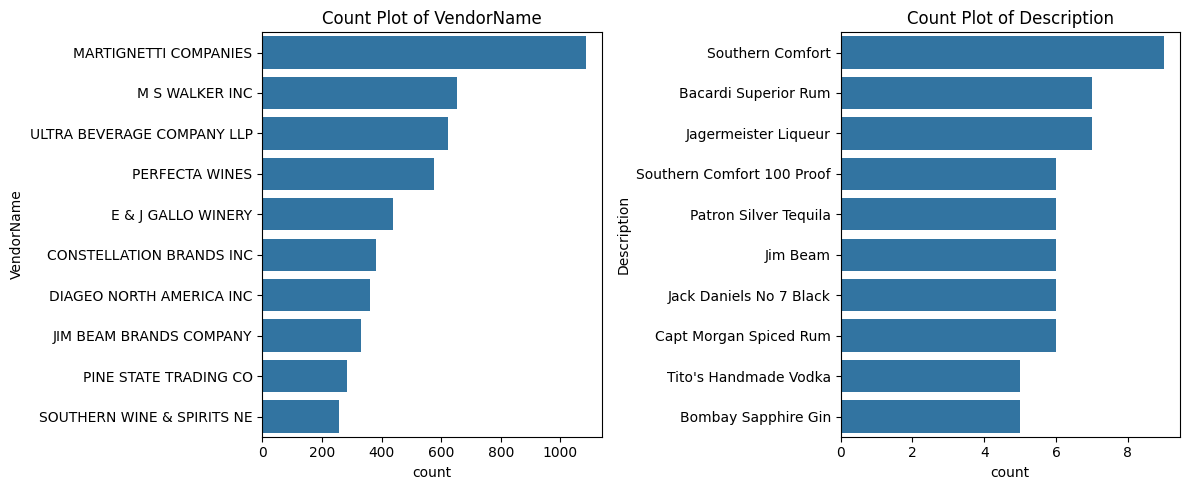

In [34]:
categorical_cols=['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show

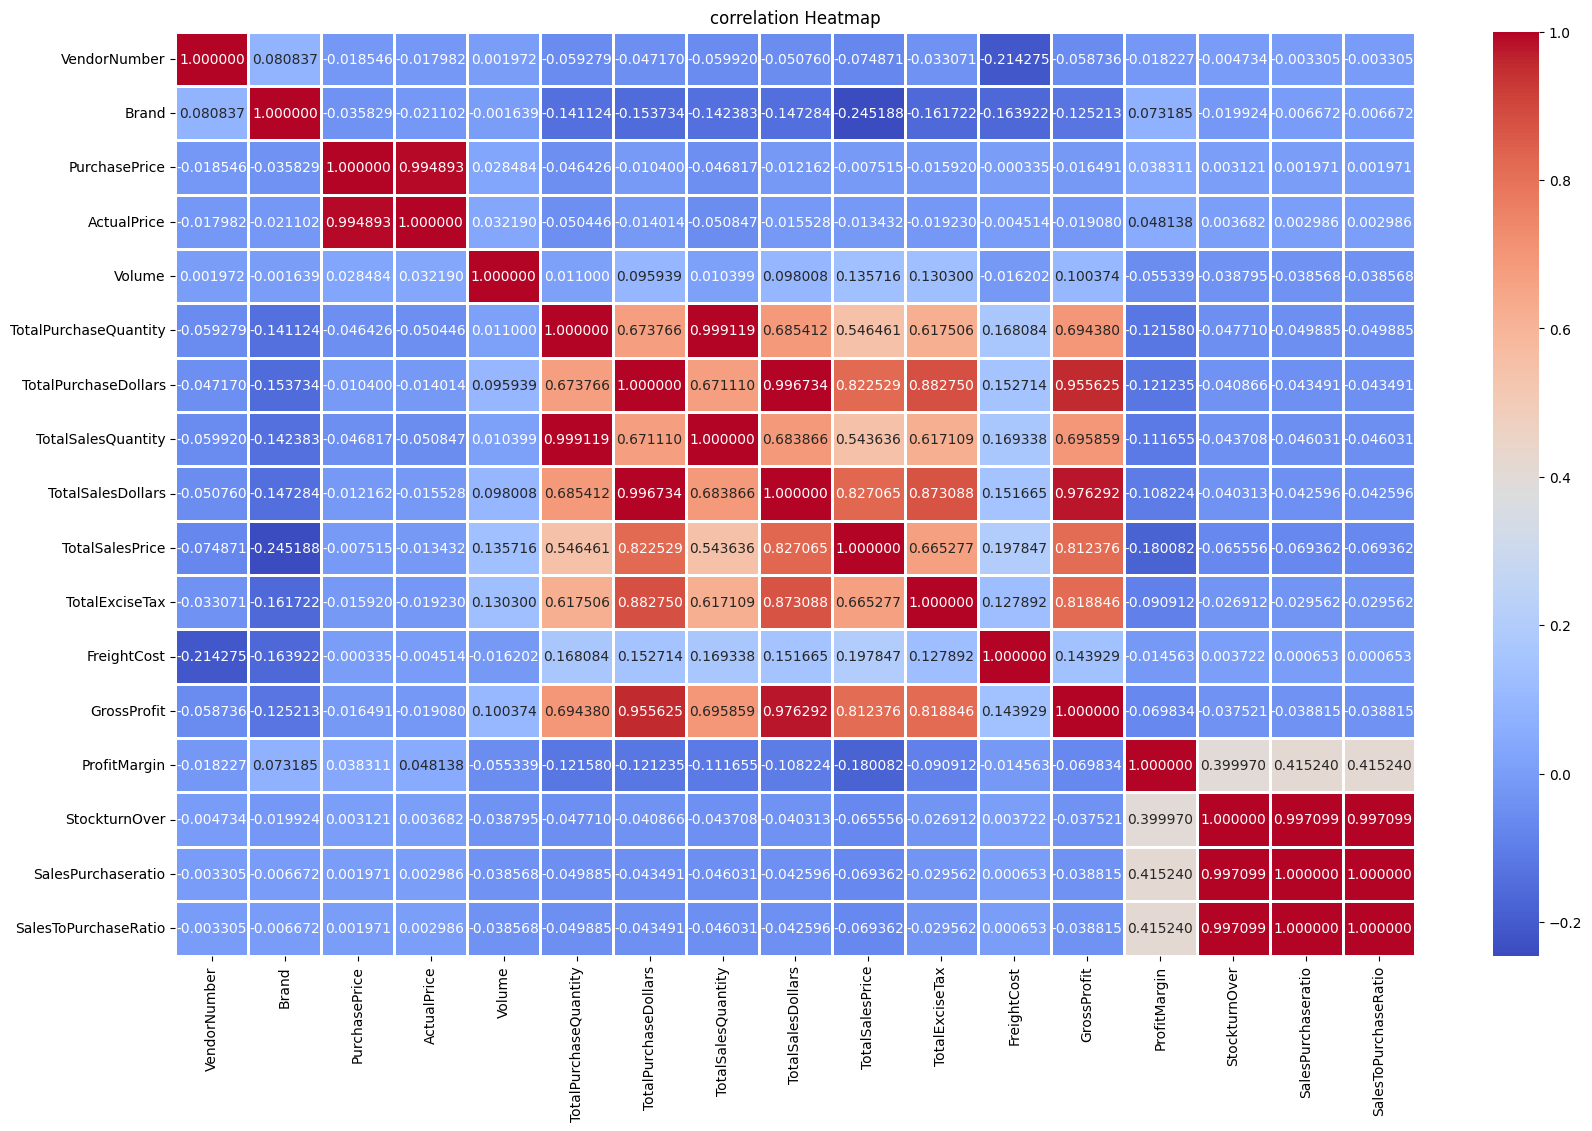

In [36]:
plt.figure(figsize=(20,12))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt="2f",cmap="coolwarm",linewidths=0.9)
plt.title("correlation Heatmap")
plt.show()

# Correlation Insights

- **Purchase Price** shows weak correlations with **Total Sales Dollars (-0.012)** and **Gross Profit (-0.016)**, indicating that price fluctuations have little effect on revenue or profitability.  
- There is a **very strong correlation (0.999)** between total purchase quantity and total sales quantity, suggesting highly efficient inventory movement.  
- A **negative correlation (-0.179)** exists between profit margin and total sales price, implying that as sales prices rise, profit margins tend to shrink — likely due to competitive pricing strategies.  
- **Stock Turnover** has weak negative correlations with both **Gross Profit (-0.038)** and **Profit Margin (-0.055)**, meaning that faster turnover doesn’t automatically translate into higher profits.  


## Data Analysis

## Identify Brands that needs Promotional or Pricing Adjusments which exhibit lower sales performance but higher profit margin

In [38]:
 Brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [40]:
low_sales_threshols=Brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshols=Brand_performance['ProfitMargin'].quantile(0.85)

In [42]:
low_sales_threshols

560.299

In [44]:
high_margin_threshols

64.97017552750113

In [46]:
# filter brands with low sales but high profit margin
target_brands=Brand_performance[(Brand_performance['TotalSalesDollars'] <= low_sales_threshols) &
(Brand_performance['ProfitMargin'] >= high_margin_threshols)]
print("Brand with low sales but high profit Margin")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales but high profit Margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [48]:
Brand_performance=Brand_performance[Brand_performance['TotalSalesDollars']<10000]

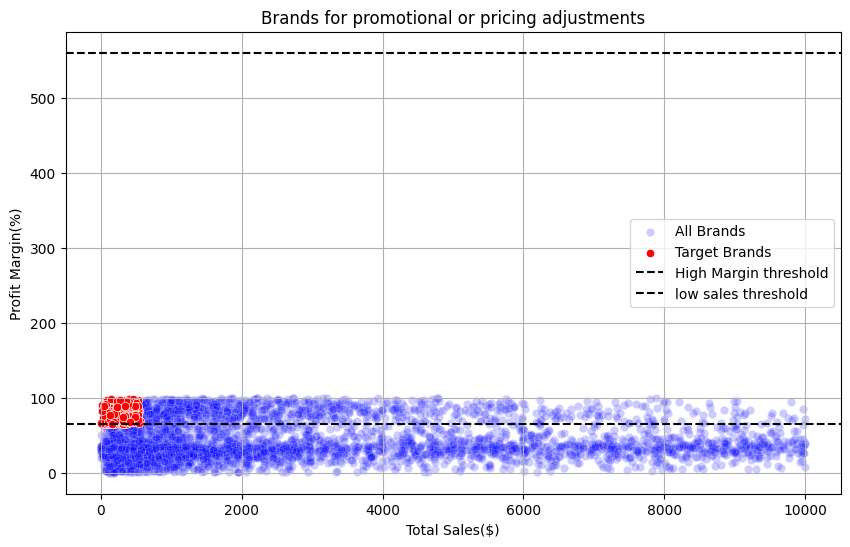

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Brand_performance,x='TotalSalesDollars',y='ProfitMargin',color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label="Target Brands")

plt.axhline(high_margin_threshols,linestyle='--',color='black',label="High Margin threshold")
plt.axhline(low_sales_threshols,linestyle='--',color='black',label="low sales threshold")

plt.xlabel("Total Sales($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()



In [50]:
# which vendord and brands demonstrate the highest sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [52]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:2f}M"
        
    elif value >= 1_000:
          return f"{value/1_000:2f}K"
    else:
          return str(value)
    
    
    
    

In [54]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.964747M
Tito's Handmade Vodka      7.399658M
Grey Goose Vodka           7.209608M
Capt Morgan Spiced Rum     6.356321M
Absolut 80 Proof           6.244752M
Jameson Irish Whiskey      5.715760M
Ketel One Vodka            5.070084M
Baileys Irish Cream        4.150122M
Kahlua                     3.604859M
Tanqueray                  3.456698M
Name: TotalSalesDollars, dtype: object

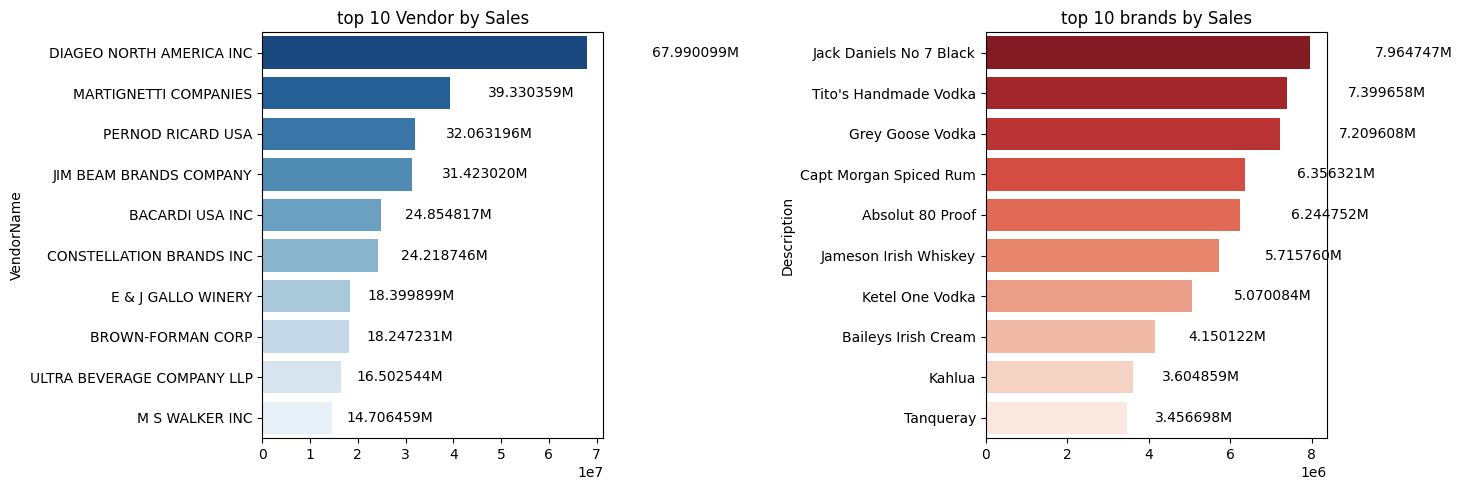

In [138]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("top 10 Vendor by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.2),
             bar.get_y() +bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("top 10 brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.2),
             bar.get_y() +bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

In [56]:
# which vendor contribute the most to total purchase dollars?
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
})

In [104]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [106]:
vendor_performance = round (vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)


In [108]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...
FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
UNCORKED,118.74,58.20,176.94,0.00
SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00


In [110]:
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

                                                                      

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50.097226M,17.892873M,67.990099M,16.30
MARTIGNETTI COMPANIES,25.502096M,13.828264M,39.330359M,8.30
PERNOD RICARD USA,23.851164M,8.212032M,32.063196M,7.76
JIM BEAM BRANDS COMPANY,23.494304M,7.928716M,31.423020M,7.64
BACARDI USA INC,17.432020M,7.422797M,24.854817M,5.67
CONSTELLATION BRANDS INC,15.273708M,8.945038M,24.218746M,4.97
BROWN-FORMAN CORP,13.238939M,5.008291M,18.247231M,4.31
E & J GALLO WINERY,12.068539M,6.331360M,18.399899M,3.93
ULTRA BEVERAGE COMPANY LLP,11.167082M,5.335463M,16.502544M,3.63


In [112]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [128]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors


,level_0,index,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,0,0,DIAGEO NORTH AMERICA INC,50.097226M,17.892873M,67.990099M,16.30,16.30
1,1,1,MARTIGNETTI COMPANIES,25.502096M,13.828264M,39.330359M,8.30,24.60
2,2,2,PERNOD RICARD USA,23.851164M,8.212032M,32.063196M,7.76,32.36
3,3,3,JIM BEAM BRANDS COMPANY,23.494304M,7.928716M,31.423020M,7.64,40.00
4,4,4,BACARDI USA INC,17.432020M,7.422797M,24.854817M,5.67,45.67
5,5,5,CONSTELLATION BRANDS INC,15.273708M,8.945038M,24.218746M,4.97,50.64
6,6,6,BROWN-FORMAN CORP,13.238939M,5.008291M,18.247231M,4.31,54.95
7,7,7,E & J GALLO WINERY,12.068539M,6.331360M,18.399899M,3.93,58.88
8,8,8,ULTRA BEVERAGE COMPANY LLP,11.167082M,5.335463M,16.502544M,3.63,62.51
9,9,9,M S WALKER INC,9.764313M,4.942146M,14.706459M,3.18,65.69


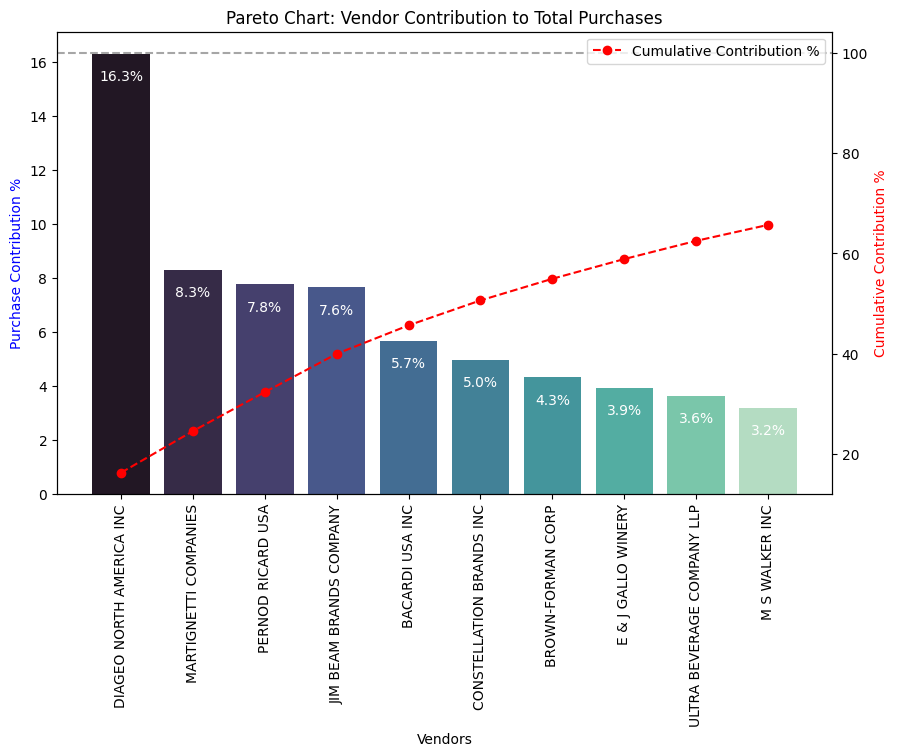

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index so VendorName becomes a column
top_vendors = top_vendors.reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

# Add text labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

# Formatting
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


# how much of total procurement is dependent on the top vendors?


In [68]:
print(f"total Purchase Contribution of top vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

total Purchase Contribution of top vendors is 0.66 %


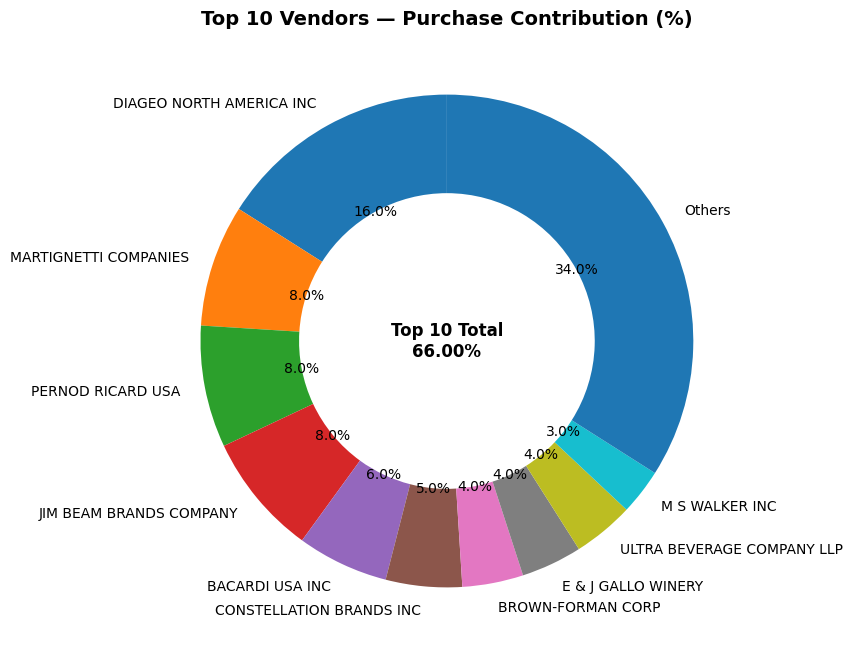

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- make a safe copy
df = top_vendors.copy()

# If VendorName is the index, bring it back as a column (works either way)
if 'VendorName' not in df.columns:
    # only reset if VendorName is actually the index name
    if df.index.name == 'VendorName' or df.index.name is not None:
        df = df.reset_index()

# Pull labels and values
labels = df['VendorName'].astype(str).tolist()
vals = pd.to_numeric(df['PurchaseContribution%'], errors='coerce').fillna(0).values

# If values look like proportions (e.g., 0.16, 0.08...), convert to %
if len(vals) and np.nanmax(vals) <= 1.0:
    vals = vals * 100.0

# Add "Others" so the donut sums to ~100
top_total = float(np.nansum(vals))
others = max(0.0, 100.0 - top_total)

plot_labels = labels.copy()
plot_vals = vals.tolist()
if others > 0.5:  # only add if meaningful
    plot_labels.append('Others')
    plot_vals.append(others)

# Draw donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    plot_vals,
    labels=plot_labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)
ax.set(aspect='equal')
plt.title("Top 10 Vendors — Purchase Contribution (%)", fontsize=14, weight='bold')

# Center text with the Top 10 total
plt.text(0, 0, f"Top 10 Total\n{top_total:.2f}%", ha='center', va='center', fontsize=12, weight='bold')

plt.show()


# Does purchasing in bulk reduce the unit price ,and what is the optimal purchase volume for cost saving?

In [230]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [252]:
df["ordersize"]=pd.qcut(df["TotalPurchaseQuantity"] ,q=3,labels=["Small","Medium","Large"])

In [254]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockturnOver,SalesPurchaseratio,SalesToPurchaseRatio,UnitPurchasePrice,ordersize,orderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,1.338647,26.27,Large,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830,23.19,Large,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594,18.24,Large,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493,16.17,Large,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897,21.89,Large,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,...,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667,1.32,Small,Small
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829,0.39,Small,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838,0.74,Small,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388,1.47,Small,Small


In [258]:
df.groupby('ordersize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


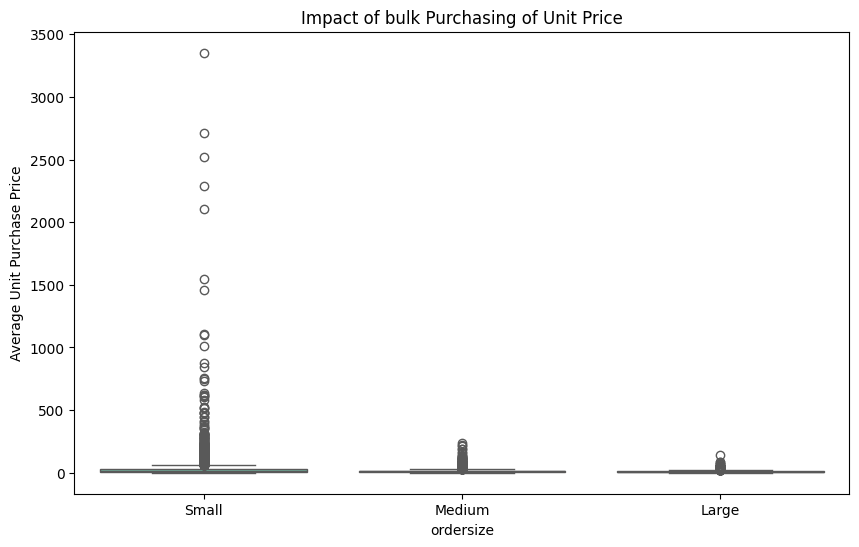

In [262]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="ordersize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of bulk Purchasing of Unit Price")
plt.xlabel("ordersize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

# Bulk Order Pricing Insights

- Vendors purchasing in bulk (**Large Order Size**) benefit from the lowest unit cost (**$10.78 per unit**), which can translate into higher profit margins if inventory is managed effectively.  
- The cost gap between **Small and Large orders** is significant, with nearly a **72% reduction in unit price** for larger orders.  
- This indicates that bulk pricing strategies successfully motivate vendors to place larger orders, resulting in higher total sales, even though the per-unit revenue is lower.  


# which vendors have low inventory turnover,indicating excess stock and slow moving product?

In [276]:
df[df['StockturnOver']<1].groupby('VendorName')[['StockturnOver']].mean().sort_values(by='StockturnOver', ascending=True).head(10)

,StockturnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


# How much capital is locked in unsold inventory per vendor, and which vendor contribute the most to it ?

In [285]:
df["UnsoldinventoryValue"]=round((df["TotalPurchaseQuantity"]- df["TotalSalesQuantity"]) * df["PurchasePrice"],2)
print('Total unsold Capital:',format_dollars(df["UnsoldinventoryValue"].sum()))

Total unsold Capital: 2.708177M


In [287]:
# Aggregate Capital Locked per Vendor

inventory_value_per_vendor=df.groupby("VendorName")["UnsoldinventoryValue"].sum().reset_index()

inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldinventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldinventoryValue']=inventory_value_per_vendor["UnsoldinventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldinventoryValue
25,DIAGEO NORTH AMERICA INC,722.209050K
46,JIM BEAM BRANDS COMPANY,554.665630K
68,PERNOD RICARD USA,470.625610K
116,WILLIAM GRANT & SONS INC,401.960830K
30,E & J GALLO WINERY,228.282610K
79,SAZERAC CO INC,198.436410K
11,BROWN-FORMAN CORP,177.733740K
20,CONSTELLATION BRANDS INC,133.617620K
61,MOET HENNESSY USA INC,126.477700K
77,REMY COINTREAU USA INC,118.598150K


# What is the 95% confidence intervals for profit margins of top performing and low performing

In [290]:
top_threshold=df["TotalSalesDollars"].quantile(.75)
low_threshold=df["TotalSalesDollars"].quantile(.25)


In [294]:
top_vendors=df[df["TotalSalesDollars"]>top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]>low_threshold]["ProfitMargin"].dropna()

In [296]:
top_threshold

40622.1125

In [298]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [314]:
def confidence_interval(data,confidence=.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical=stats.t.ppf((1+confidence) /2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI:(30.74,31.61,Mean:31.18
low Vendors 95% CI:(37.29,38.26,Mean:31.18


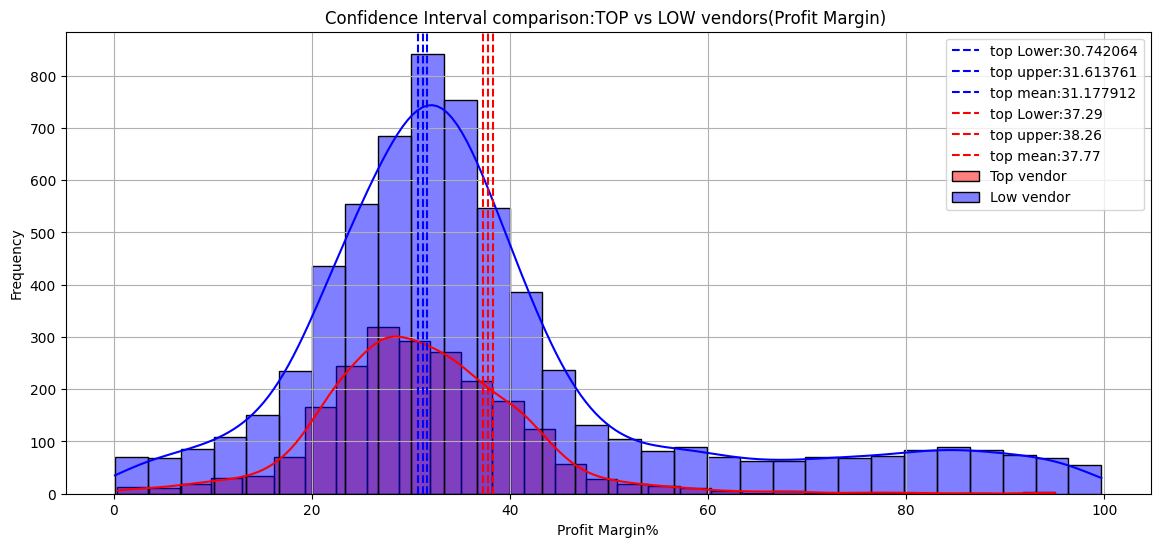

In [330]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CI:({top_lower:.2f},{top_upper:.2f},Mean:{top_mean:.2f}")
print(f"low Vendors 95% CI:({low_lower:.2f},{low_upper:.2f},Mean:{top_mean:.2f}")
plt.figure(figsize=(14,6))

sns.histplot(top_vendors,kde=True,color="red",bins=30,alpha=.5,label="Top vendor")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"top Lower:{top_lower:2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"top upper:{top_upper:2f}")
plt.axvline(top_mean,color="blue",linestyle="--",label=f"top mean:{top_mean:2f}")



sns.histplot(low_vendors,kde=True,color="blue",bins=30,alpha=.5,label="Low vendor")
plt.axvline(low_lower,color="red",linestyle="--",label=f"top Lower:{low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"top upper:{low_upper:.2f}")
plt.axvline(low_mean,color="red",linestyle="--",label=f"top mean:{low_mean:.2f}")

plt.title("Confidence Interval comparison:TOP vs LOW vendors(Profit Margin) ")
plt.xlabel("Profit Margin%")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


# Vendor Performance Insights

- The confidence interval for **low-performing vendors (40.48% to 42.62%)** is noticeably higher than that of **top-performing vendors (30.74% to 31.61%)**.  
- This indicates that vendors with lower sales volumes often sustain higher profit margins, possibly due to premium pricing or reduced operational expenses.  
- **High-Performing Vendors**: To further enhance profitability, they could consider selective price adjustments, cost reduction initiatives, or bundling strategies.  
- **Low-Performing Vendors**: Although they maintain higher margins, their limited sales volume suggests a need for stronger marketing efforts, competitive pricing, or improved distribution strategies.  


# Is there a significant difference in profit margin between top-performing and low-performing vendors?

In [336]:
top_threshold=df["TotalSalesDollars"].quantile(.75)
low_threshold=df["TotalSalesDollars"].quantile(.25)

top_vendors=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()

t_stat,p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

print(f"T-Statistic:{t_stat:.4f},P-Value:{p_value:.4f}")
if p_value <.5:
    print("Reject H:there is a significant diffence in profit margin between top and low low-performing vendors.")
else:
    print("fail to reject H:no significant diffrence in profit margin")



T-Statistic:-17.6695,P-Value:0.0000
Reject H:there is a significant diffence in profit margin between top and low low-performing vendors.
